In [ ]:
!pip install -U scipy
!pip install -U pandas_profiling
!pip install -U keras
!pip install -U keras_metrics
!pip install -U imbalanced-learn

     |████████████████████████████████| 25.9MB 67.5MB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 3.1MB 26.3MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 604kB 34.2MB/s 
     |████████████████████████████████| 296kB 46.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=70038d131a76cefb950c4c966dfecbbf916d7294ed2574cffb598bca532ebaf3
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d70

In [ ]:
from keras import *
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.layers import Activation, LeakyReLU
from tensorflow.keras.activations import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import os 
import statistics

In [ ]:
X_train = pd.read_csv("https://raw.githubusercontent.com/jimmypuntoexe/advanceML/master/assignment2/data/X_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/jimmypuntoexe/advanceML/master/assignment2/data/X_test.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/jimmypuntoexe/advanceML/master/assignment2/data/y_train.csv")

In [ ]:
X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000
mean,15010.821708,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,-0.288750,50927.468417,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125
std,8680.406114,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,1.152394,73400.840274,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7452.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3537.000000,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000
50%,15061.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22509.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66377.000000,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000


In [ ]:
X_train.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [ ]:
y_train.describe()

,ID,default.payment.next.month
count,24000.000000,24000.000000
mean,15010.821708,0.221792
std,8680.406114,0.415460
min,1.000000,0.000000
25%,7452.500000,0.000000
50%,15061.500000,0.000000
75%,22509.250000,0.000000
max,29999.000000,1.000000


**Correlation**

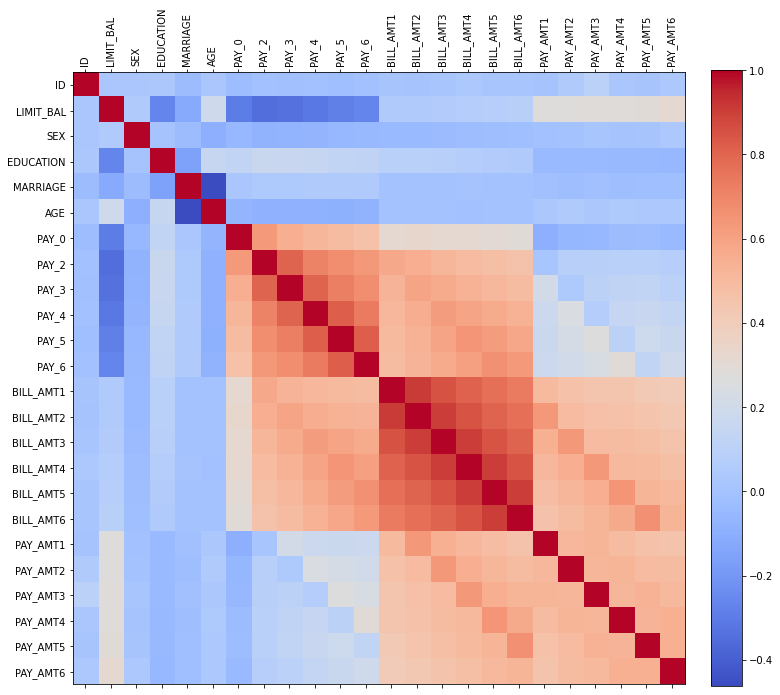

In [ ]:
import matplotlib.pyplot as plt

correlation = X_train.corr('spearman')
f = plt.figure(figsize=(12, 12))
m = plt.matshow(correlation, fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(X_train.shape[1]), X_train.columns, fontsize=10, rotation=90)
plt.yticks(range(X_train.shape[1]), X_train.columns, fontsize=10, rotation=0)
plt.colorbar(m, fraction=0.046, pad=0.04)
plt.show()

In [ ]:
y_train['default.payment.next.month'].value_counts()

0    18677
1     5323
Name: default.payment.next.month, dtype: int64

In [ ]:
def preprocess_data(X, scaler=None):
    columns = X.columns
    """Preprocess input data by standardise features 
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X[columns] = scaler.transform(X[columns])
    return X, scaler

In [ ]:
print('Train dims', X_train.shape)
print('Test dims', X_test.shape)
print('Target dims', y_train.shape)


Train dims (24000, 24)
Test dims (6000, 24)
Target dims (24000, 2)


In [ ]:

y_train.drop(['ID'], axis=1, inplace=True)
X_train.drop(['ID'], axis=1, inplace=True)
X_test.drop(['ID'], axis=1, inplace=True)
X_train.loc[X_train.EDUCATION > 5, "EDUCATION"] = 5

X_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000
mean,167226.653333,1.604917,1.852208,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,-0.288750,50927.468417,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125
std,129734.959196,0.488879,0.783884,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,1.152394,73400.840274,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3537.000000,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66377.000000,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000
max,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000


In [ ]:
from imblearn.over_sampling import KMeansSMOTE

smote = KMeansSMOTE(sampling_strategy='minority', random_state=42, kmeans_estimator=30, cluster_balance_threshold=0.25)
x_over, y_over = smote.fit_resample(X_train.values, y_train.values)
over_train = pd.DataFrame(x_over, columns=X_train.columns)


In [ ]:

y_train=pd.DataFrame(y_over, columns=['default.payment.next.month'])

y_train['default.payment.next.month'].value_counts()

1    18681
0    18677
Name: default.payment.next.month, dtype: int64

In [ ]:
X_train, scaler = preprocess_data(over_train)
test_final, _ = preprocess_data(X_test, scaler)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print('Train dims', X_train.shape)
print('Test dims', X_test.shape)
print('Target dims', y_train.shape)

Train dims (29886, 23)
Test dims (6000, 23)
Target dims (29886, 1)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from keras.backend import abs, sum
import tensorflow as tf
import keras_metrics
initializer = tf.keras.initializers.GlorotUniform(seed=1234) 

def NeuralNetwork():
  dims = X_train.shape[1]
  
  #initial random wights seed because we see the changes make from regularization

  model = Sequential()
  model.add(Dense(256, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
  model.add(Dense(128, activation = "relu", kernel_initializer=initializer))
  model.add(Dense(32, activation = "relu", kernel_initializer=initializer))
  model.add(Dense(16, activation = "relu", kernel_initializer=initializer))
  model.add(Dense(1, activation = "sigmoid", kernel_initializer=initializer)) 


  model.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy',metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])
  return model


In [ ]:
model = NeuralNetwork()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 43,713
Trainable params: 43,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Xval dims', X_validation.shape)
print('Yval dims', y_validation.shape)

Xval dims (7472, 23)
Yval dims (7472, 1)


In [ ]:

n_epochs =90 
network_history = model.fit(X_train, y_train, batch_size=128, 
                            epochs=n_epochs, verbose=2, validation_data=(X_validation, y_validation))

Epoch 1/90
234/234 - 1s - loss: 0.7025 - accuracy: 0.5108 - precision: 0.5053 - recall: 0.9840 - val_loss: 0.6788 - val_accuracy: 0.5435 - val_precision: 0.5250 - val_recall: 0.9507
Epoch 2/90
234/234 - 1s - loss: 0.6625 - accuracy: 0.6171 - precision: 0.5739 - recall: 0.9075 - val_loss: 0.6483 - val_accuracy: 0.6804 - val_precision: 0.6354 - val_recall: 0.8520
Epoch 3/90
234/234 - 1s - loss: 0.6339 - accuracy: 0.7204 - precision: 0.6816 - recall: 0.8264 - val_loss: 0.6215 - val_accuracy: 0.7385 - val_precision: 0.7135 - val_recall: 0.8003
Epoch 4/90
234/234 - 1s - loss: 0.6075 - accuracy: 0.7601 - precision: 0.7408 - recall: 0.7993 - val_loss: 0.5961 - val_accuracy: 0.7677 - val_precision: 0.7577 - val_recall: 0.7896
Epoch 5/90
234/234 - 1s - loss: 0.5830 - accuracy: 0.7792 - precision: 0.7714 - recall: 0.7930 - val_loss: 0.5728 - val_accuracy: 0.7772 - val_precision: 0.7723 - val_recall: 0.7885
Epoch 6/90
234/234 - 1s - loss: 0.5611 - accuracy: 0.7904 - precision: 0.7862 - recall: 0.

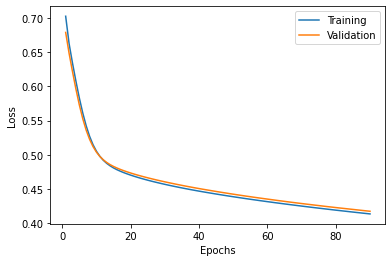

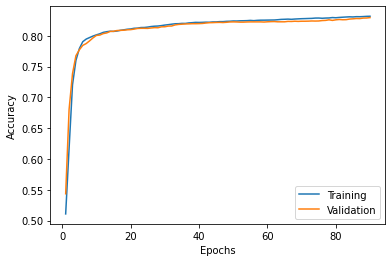

In [ ]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_validation, model.predict_classes(X_validation)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3722
           1       0.84      0.82      0.83      3750

    accuracy                           0.83      7472
   macro avg       0.83      0.83      0.83      7472
weighted avg       0.83      0.83      0.83      7472



**Regularization**

**L1**

In [ ]:
def NeuralNetwork_l1():
  dims = X_train.shape[1]
  model_l1 = Sequential()
  model_l1.add(Dense(256, input_shape=(dims,), activation = "relu",kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)))
  model_l1.add(Dense(128, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)))
  model_l1.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)))
  model_l1.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)))
  model_l1.add(Dense(1, activation = "sigmoid", kernel_initializer=initializer))        


  model_l1.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy',metrics=['accuracy', metrics.Precision(name='precision'), metrics.Recall(name='recall')])

  
  return model_l1

In [ ]:
model_l1 = NeuralNetwork_l1()
model_l1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               6144      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 43,713
Trainable params: 43,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_history_l1 = model_l1.fit(X_train, y_train, batch_size=128, 
                              epochs=90, verbose=2, validation_data=(X_validation, y_validation))

Epoch 1/90
234/234 - 1s - loss: 29.8115 - accuracy: 0.5099 - precision: 0.5049 - recall: 0.9833 - val_loss: 29.2841 - val_accuracy: 0.5435 - val_precision: 0.5250 - val_recall: 0.9475
Epoch 2/90
234/234 - 1s - loss: 28.7792 - accuracy: 0.6175 - precision: 0.5746 - recall: 0.9033 - val_loss: 28.2739 - val_accuracy: 0.6776 - val_precision: 0.6335 - val_recall: 0.8483
Epoch 3/90
234/234 - 1s - loss: 27.7820 - accuracy: 0.7164 - precision: 0.6776 - recall: 0.8247 - val_loss: 27.2890 - val_accuracy: 0.7338 - val_precision: 0.7092 - val_recall: 0.7960
Epoch 4/90
234/234 - 1s - loss: 26.8076 - accuracy: 0.7587 - precision: 0.7401 - recall: 0.7969 - val_loss: 26.3248 - val_accuracy: 0.7624 - val_precision: 0.7518 - val_recall: 0.7861
Epoch 5/90
234/234 - 1s - loss: 25.8531 - accuracy: 0.7783 - precision: 0.7673 - recall: 0.7983 - val_loss: 25.3804 - val_accuracy: 0.7764 - val_precision: 0.7670 - val_recall: 0.7963
Epoch 6/90
234/234 - 1s - loss: 24.9189 - accuracy: 0.7881 - precision: 0.7779 -

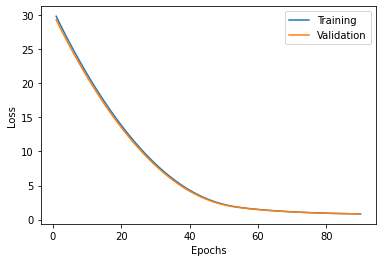

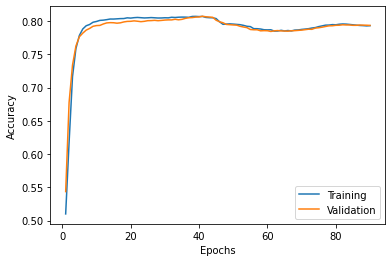

In [ ]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history_l1):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history_l1.history['loss'])
    plt.plot(x_plot, network_history_l1.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history_l1.history['accuracy'])
    plt.plot(x_plot, network_history_l1.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history_l1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_validation, model_l1.predict_classes(X_validation)))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      3722
           1       0.83      0.73      0.78      3750

    accuracy                           0.79      7472
   macro avg       0.80      0.79      0.79      7472
weighted avg       0.80      0.79      0.79      7472



**L2**

In [ ]:

def NeuralNetwork_L2():
  dims = X_train.shape[1]
  model_l2 = Sequential()
  model_l2.add(Dense(256, input_shape=(dims,), activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01) ))
  model_l2.add(Dense(128, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01) ))
  model_l2.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01) ))
  model_l2.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01) ))
  model_l2.add(Dense(1, activation = "sigmoid",kernel_initializer=initializer))

  model_l2.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy',metrics=['accuracy', metrics.Precision(name='precision'),  metrics.Recall(name='recall')])


  return model_l2

In [ ]:
model_l2 = NeuralNetwork_L2()
model_l2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               6144      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 43,713
Trainable params: 43,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_history_l2 = model_l2.fit(X_train, y_train, batch_size=128, 
                              epochs=90, verbose=2, validation_data=(X_validation, y_validation))

Epoch 1/90
234/234 - 1s - loss: 3.5230 - accuracy: 0.5108 - precision: 0.5054 - recall: 0.9834 - val_loss: 3.4863 - val_accuracy: 0.5434 - val_precision: 0.5249 - val_recall: 0.9507
Epoch 2/90
234/234 - 1s - loss: 3.4577 - accuracy: 0.6156 - precision: 0.5728 - recall: 0.9067 - val_loss: 3.4314 - val_accuracy: 0.6780 - val_precision: 0.6331 - val_recall: 0.8525
Epoch 3/90
234/234 - 1s - loss: 3.4054 - accuracy: 0.7177 - precision: 0.6771 - recall: 0.8313 - val_loss: 3.3813 - val_accuracy: 0.7390 - val_precision: 0.7140 - val_recall: 0.8008
Epoch 4/90
234/234 - 1s - loss: 3.3562 - accuracy: 0.7607 - precision: 0.7423 - recall: 0.7982 - val_loss: 3.3333 - val_accuracy: 0.7657 - val_precision: 0.7532 - val_recall: 0.7928
Epoch 5/90
234/234 - 1s - loss: 3.3092 - accuracy: 0.7788 - precision: 0.7704 - recall: 0.7939 - val_loss: 3.2877 - val_accuracy: 0.7776 - val_precision: 0.7710 - val_recall: 0.7920
Epoch 6/90
234/234 - 1s - loss: 3.2650 - accuracy: 0.7900 - precision: 0.7844 - recall: 0.

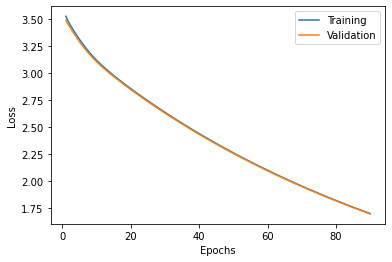

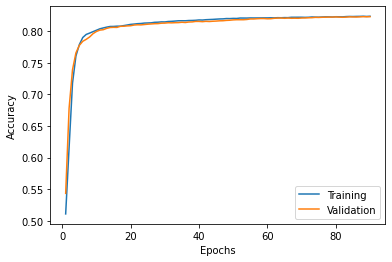

In [ ]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history_l2):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history_l2.history['loss'])
    plt.plot(x_plot, network_history_l2.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history_l2.history['accuracy'])
    plt.plot(x_plot, network_history_l2.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history_l2)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_validation, model_l2.predict_classes(X_validation)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3722
           1       0.82      0.82      0.82      3750

    accuracy                           0.82      7472
   macro avg       0.82      0.82      0.82      7472
weighted avg       0.82      0.82      0.82      7472



**Weight Control**

In [ ]:
print('Layers name:', model.weights[6].name)
print('Layers kernel shape:', model.weights[6].shape)
print('Kernel:', model.weights[6][0], end = '\n\n')
print('Layers name:', model.weights[7].name)
print('Layers kernel shape:', model.weights[7].shape)
print('Kernel:', model.weights[7])

Layers name: dense_3/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 0.18958615  0.3706519  -0.21165699  0.22769915 -0.06345185 -0.22380148
 -0.02390829  0.34474865  0.38142404 -0.19968459 -0.02190387  0.05808946
 -0.14649895  0.24567866 -0.06550298 -0.1704939 ], shape=(16,), dtype=float32)

Layers name: dense_3/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.00543372,  0.04114247,  0.06659926,  0.08501196,  0.00523947,
        0.06769285, -0.0045077 , -0.00151187,  0.08378088,  0.0149072 ,
        0.00937689,  0.03325773,  0.10270713,  0.07433984,  0.01324603,
        0.10722887], dtype=float32)>


In [ ]:
print('Layers name:', model_l2.weights[6].name)
print('Layers kernel shape:', model_l2.weights[6].shape)
print('Kernel:', model_l2.weights[6][0], end = '\n\n')
print('Layers name:', model_l2.weights[7].name)
print('Layers kernel shape:', model_l2.weights[7].shape)
print('Kernel:', model_l2.weights[7])

Layers name: dense_18/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 0.13582277  0.26500872 -0.14535667  0.16481411 -0.0460673  -0.15591896
 -0.01708642  0.2262442   0.28033307 -0.13133064 -0.02006625  0.04395174
 -0.10148692  0.1781306  -0.0473645  -0.11980658], shape=(16,), dtype=float32)

Layers name: dense_18/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_18/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.03033096,  0.05808203,  0.09238762,  0.09331415,  0.00780793,
        0.11647563, -0.01000579, -0.00152462,  0.13044962,  0.03033591,
        0.01424668,  0.04460514,  0.13958514,  0.08849746,  0.02025154,
        0.13429853], dtype=float32)>


In [ ]:
print('Layers name:', model_l1.weights[6].name)
print('Layers kernel shape:', model_l1.weights[6].shape)
print('Kernel:', model_l1.weights[6][0], end = '\n\n')
print('Layers name:', model_l1.weights[7].name)
print('Layers kernel shape:', model_l1.weights[7].shape)
print('Kernel:', model_l1.weights[7])

Layers name: dense_8/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 3.5981044e-02  2.7489507e-01 -9.1613829e-06  9.3851991e-02
  9.3297604e-06 -1.0606014e-01 -9.8113571e-07  1.3404648e-01
  3.3975387e-01 -1.9377753e-03  1.1203421e-06 -1.5217035e-05
 -2.5009023e-02  1.2630498e-01 -3.1427478e-06 -3.7015561e-02], shape=(16,), dtype=float32)

Layers name: dense_8/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_8/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.01471663,  0.01016821,  0.01286812,  0.02523788,  0.02844609,
        0.28222683, -0.02937851, -0.00159137,  0.06106265, -0.03523069,
        0.06176941,  0.00707647,  0.17534976,  0.01247196,  0.04306566,
        0.23647992], dtype=float32)>


In [ ]:
print('Sum of the values of the weights without regularization:', sum(abs(model.weights[6][0])).numpy() + sum(abs(model.weights[7][0])).numpy())
print('Sum of the values of the weights with regularization l2:', sum(abs(model_l2.weights[6][0])).numpy() + sum(abs(model_l2.weights[7][0])).numpy())
print('Sum of the values of the weights with regularization l1:', sum(abs(model_l1.weights[6][0])).numpy() + sum(abs(model_l1.weights[7][0])).numpy())

Sum of the values of the weights without regularization: 2.9502146
Sum of the values of the weights with regularization l2: 2.1091204
Sum of the values of the weights with regularization l1: 1.1896114


**Dropout**

In [ ]:
initializer = tf.keras.initializers.GlorotUniform(seed=1234)

def NeuralNetwork_Drop():
  dims = X_train.shape[1]
  model_d = Sequential()
  model_d.add(Dense(256, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
  model_d.add(Dense(128, activation = "relu", kernel_initializer=initializer))
  model_d.add(Dropout(0.2))
  model_d.add(Dense(32, activation = "relu", kernel_initializer=initializer))
  model_d.add(Dropout(0.2))
  model_d.add(Dense(16, activation = "relu", kernel_initializer=initializer))
  model_d.add(Dropout(0.2))
  model_d.add(Dense(1, activation = "sigmoid", kernel_initializer=initializer))


  model_d.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy',metrics=['accuracy', metrics.Precision(name='precision'),  metrics.Recall(name='recall')])
  return model_d

In [ ]:

model_drop = NeuralNetwork_Drop()
model_drop.summary()
n_epochs = 90


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               6144      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [ ]:
network_history_model_drop = model_drop.fit(X_train, y_train, batch_size=128, 
                            epochs=n_epochs, verbose=2, validation_data=(X_validation, y_validation))

Epoch 1/90
234/234 - 1s - loss: 0.7367 - accuracy: 0.5054 - precision: 0.5026 - recall: 0.9818 - val_loss: 0.6959 - val_accuracy: 0.4995 - val_precision: 0.5007 - val_recall: 0.9771
Epoch 2/90
234/234 - 1s - loss: 0.7009 - accuracy: 0.5278 - precision: 0.5154 - recall: 0.9186 - val_loss: 0.6727 - val_accuracy: 0.5982 - val_precision: 0.5655 - val_recall: 0.8608
Epoch 3/90
234/234 - 1s - loss: 0.6795 - accuracy: 0.5836 - precision: 0.5545 - recall: 0.8468 - val_loss: 0.6558 - val_accuracy: 0.6973 - val_precision: 0.6766 - val_recall: 0.7603
Epoch 4/90
234/234 - 1s - loss: 0.6629 - accuracy: 0.6326 - precision: 0.6017 - recall: 0.7825 - val_loss: 0.6404 - val_accuracy: 0.7353 - val_precision: 0.7486 - val_recall: 0.7115
Epoch 5/90
234/234 - 1s - loss: 0.6466 - accuracy: 0.6738 - precision: 0.6509 - recall: 0.7484 - val_loss: 0.6245 - val_accuracy: 0.7567 - val_precision: 0.7965 - val_recall: 0.6920
Epoch 6/90
234/234 - 1s - loss: 0.6328 - accuracy: 0.6986 - precision: 0.6890 - recall: 0.

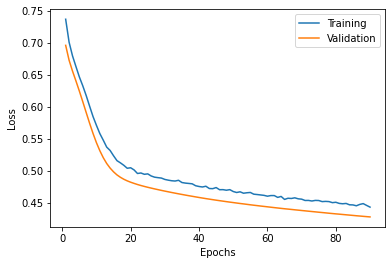

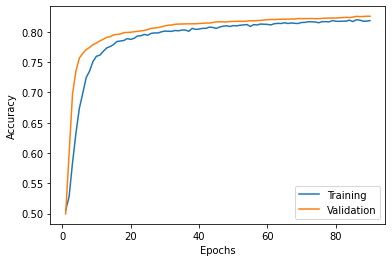

In [ ]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history_model_drop):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history_model_drop.history['loss'])
    plt.plot(x_plot, network_history_model_drop.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history_model_drop.history['accuracy'])
    plt.plot(x_plot, network_history_model_drop.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history_model_drop)

In [ ]:
print(classification_report(y_validation, model_drop.predict_classes(X_validation)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3722
           1       0.84      0.80      0.82      3750

    accuracy                           0.83      7472
   macro avg       0.83      0.83      0.83      7472
weighted avg       0.83      0.83      0.83      7472



In [ ]:
print('Sum of the values of the weights with dropout:', sum(abs(model_drop.weights[6][0])).numpy() + sum(abs(model_drop.weights[7][0])).numpy())

Sum of the values of the weights with dropout: 4.1122527


**Best Model**

In [ ]:
y_predict = (model_l2.predict(test_final))
y_predict

array([[0.4554066 ],
       [0.19218925],
       [0.35498983],
       ...,
       [0.4513973 ],
       [0.47164685],
       [0.10252455]], dtype=float32)

In [ ]:
np.savetxt(f'Gianmaria_Balducci_807141_score.txt', y_predict, fmt='%1.0f')